In [1]:
import numpy as np
import pandas as pd
from heatgeo.embedding import HeatGeo
import scprep

In [2]:
data = np.load("../data/old/sea_ad_rnaseq_pca.npy")

In [3]:
celltypes = pd.read_csv("../data/old/sea_ad_rnaseq_celltypes.csv", index_col=0)

In [5]:
emb_op = HeatGeo(knn=5)
emb = emb_op.fit_transform(data)

Using s_gd2 for MDS. None


In [6]:
emb_op.metric_computation(data)

In [7]:
colors_df = pd.read_csv("../data/old/sea_ad_rnaseq_celltypes.csv")

In [17]:
colors = colors_df['Subclass'].astype('category').cat.codes

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='HeatGeo1', ylabel='HeatGeo2'>

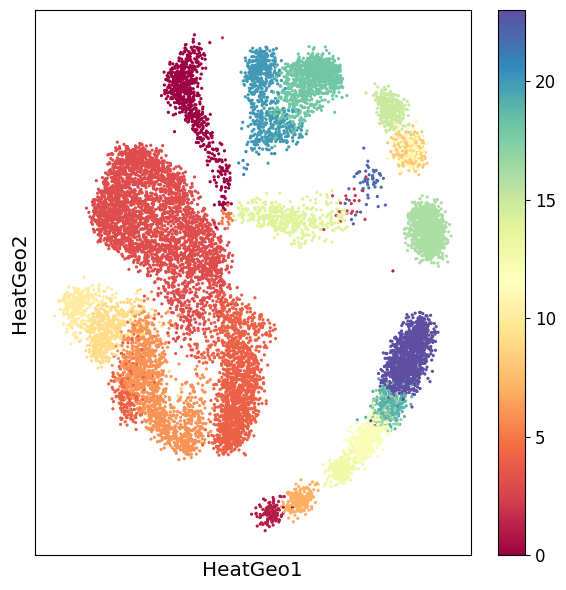

In [19]:
scprep.plot.scatter2d(emb, c=colors, figsize=(6, 6), cmap="Spectral", ticks=False, label_prefix="HeatGeo")

In [20]:
np.savez(
    '../data/sea_ad_heatgeo.npz', 
    data=data, 
    phate=emb, 
    dist=emb_op.dist, 
    colors=colors
)